In [1]:
# Mengimport Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA


In [2]:
# Membaca file csv

data = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [3]:
# Memeriksa data kosong 

data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# Memeriksa data yang memiliki duplikat

data.duplicated().sum()

0

In [5]:
# Menormalisasikan data dengan Standar Skala

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)


In [ ]:
# Inisialisasi daftar untuk menyimpan skor Silhouette
silhouette_scores = []

# Menentukan rentang jumlah klaster yang akan dievaluasi (2 hingga 10)
cluster_range = range(2, 11)

for k in cluster_range:
    # Membuat model K-Means dengan jumlah klaster k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Melatih model dan mendapatkan label klaster untuk setiap data
    labels = kmeans.fit_predict(x_scaled)
    
    # Menghitung skor Silhouette untuk mengukur seberapa baik data dikelompokkan
    score = silhouette_score(x_scaled, labels)
    
    # Menyimpan skor Silhouette ke dalam daftar
    silhouette_scores.append(score)

NameError: name 'X_scaled' is not defined

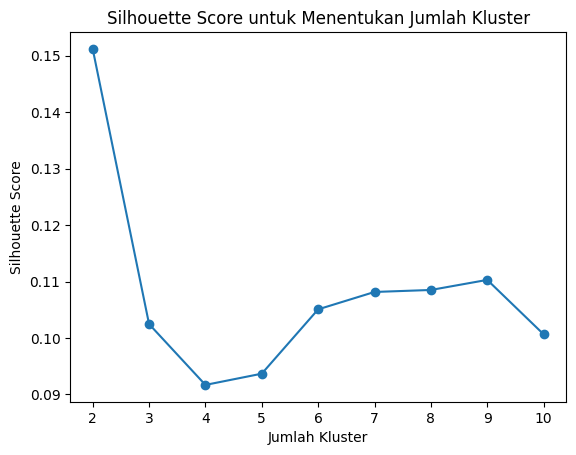

In [ ]:
# Cari jumlah kluster dengan Silhouette Score tertinggi
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

# Plot hasil Silhouette Score
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Kluster')
plt.show()


In [ ]:
# Menampilkan jumlah cluster optimal

optimal_clusters

2

In [ ]:
# Menghapus kolom "DEATH_EVENT" dari data, karena tidak digunakan sebagai fitur input
x = data.drop(columns=["DEATH_EVENT"])

# Melakukan standarisasi fitur agar memiliki distribusi dengan mean = 0 dan standar deviasi = 1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Mengubah kembali hasil standarisasi ke dalam bentuk DataFrame dengan nama kolom yang sama
x_scaled_data = pd.DataFrame(x_scaled, columns=x.columns)

# Menampilkan beberapa baris pertama dari data yang telah distandarisasi
x_scaled_data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [ ]:
# Mengurangi dimensi data menjadi 2 menggunakan PCA (Principal Component Analysis)
pca = PCA(n_components=2)

# Menerapkan PCA pada data yang telah distandarisasi
x_pca = pca.fit_transform(x_scaled)


In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(x_scaled)

In [ ]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(x_scaled)

In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scaled)

In [ ]:
# Mengevaluasi kualitas klaster menggunakan Silhouette Score
kmeans_silhouette = silhouette_score(x_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(x_scaled, hierarchical_labels)
# Untuk DBSCAN, cek apakah ada lebih dari 1 klaster sebelum menghitung skor; jika tidak, set ke -1
dbscan_silhouette = silhouette_score(x_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Mengevaluasi kualitas klaster menggunakan Davies-Bouldin Score
kmeans_davies = davies_bouldin_score(x_scaled, kmeans_labels)
hierarchical_davies = davies_bouldin_score(x_scaled, hierarchical_labels)
# Sama seperti Silhouette Score, Davies-Bouldin hanya dihitung jika ada lebih dari 1 klaster
dbscan_davies = davies_bouldin_score(x_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

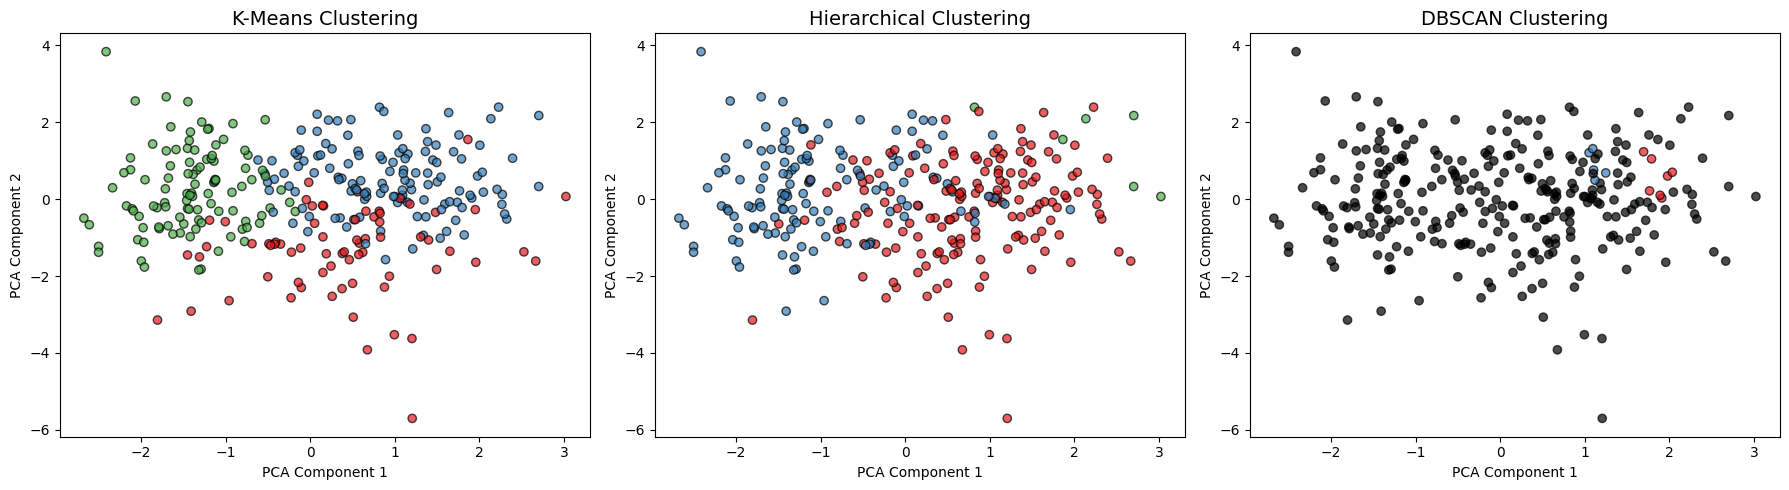

In [ ]:
# Visualisasi hasil clustering dengan PCA
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Daftar algoritma dan label klaster yang digunakan
algorithms = ["K-Means", "Hierarchical", "DBSCAN"]
labels_list = [kmeans_labels, hierarchical_labels, dbscan_labels]

# Menggunakan palet warna yang lebih kaya untuk membedakan klaster dengan lebih jelas
colors = sns.color_palette("Set1", n_colors=len(set(kmeans_labels)) + 1)

for i, (algo, labels) in enumerate(zip(algorithms, labels_list)):
    # Warna merah digunakan untuk noise (-1) pada DBSCAN, jika ada
    cluster_colors = [colors[l] if l != -1 else "black" for l in labels]
    
    axes[i].scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_colors, alpha=0.7, edgecolors="k")
    axes[i].set_title(f"{algo} Clustering", fontsize=14)
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


In [ ]:
# Menampilkan hasil evaluasi clustering dalam bentuk dictionary
evaluation_scores = {
    "K-Means": {
        "Silhouette Score": kmeans_silhouette,
        "Davies-Bouldin Index": kmeans_davies
    },
    "Hierarchical": {
        "Silhouette Score": hierarchical_silhouette,
        "Davies-Bouldin Index": hierarchical_davies
    },
    "DBSCAN": {
        "Silhouette Score": dbscan_silhouette,
        "Davies-Bouldin Index": dbscan_davies
    }
}

# Menampilkan hasil evaluasi
evaluation_scores


{'K-Means': {'Silhouette Score': 0.10046266915830476,
  'Davies-Bouldin Index': 2.5148221400837163},
 'Hierarchical': {'Silhouette Score': 0.09072961957262479,
  'Davies-Bouldin Index': 2.4975833380397012},
 'DBSCAN': {'Silhouette Score': -0.12401989945987013,
  'Davies-Bouldin Index': 1.6643451027035805}}